In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [17]:
# Read the data into a pandas dataframe and check the head
job_df = pd.read_csv(r'C:\Users\Sotiris\Desktop\Python\Fake_Job_Postings\Data\fake_job_postings.csv')
job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [18]:
# We see that we have 17880 observations and 18 features
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [19]:
# Check the missing values of our dataset
job_df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [20]:
# Drop the columns 'department' and 'salary_range', that have above 50% missing values as well as 'job_id' which is useless
job_df = job_df.drop(['department','salary_range','job_id'],axis=1)

In [21]:
# Drop the unknown data and reset the index
job_df = job_df.dropna()
job_df = job_df.reset_index(drop=True)

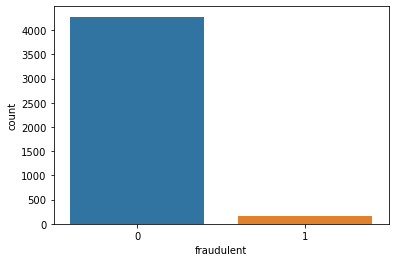

In [22]:
# We see that our target is very imbalanced
sns.countplot(job_df['fraudulent']);

In [23]:
# Store the feature matrix X and the target vector y
X = job_df.drop('fraudulent',axis=1)
y = job_df['fraudulent']

In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=42)

# Check the shapes of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3330, 14)
(1111, 14)
(3330,)
(1111,)


In [25]:
# Instantiate the countvectorizer and the columntransformer
vect = CountVectorizer()
ct = make_column_transformer((vect,'title'),(vect,'location'),(vect,'company_profile'),(vect,'description'),(vect,'requirements'),
(vect,'benefits'),(vect,'employment_type'),(vect,'required_experience'),(vect,'required_education'),(vect,'industry'),(vect,'function'),
remainder = 'passthrough')

In [26]:
# Learn the 'vocabulary' of the training data and transform the training data into a 'document-term matrix'
X_train_dtm = ct.fit_transform(X_train)

# Transform the testing data into a 'document-term matrix' using the 'vocabulary' it learned
X_test_dtm = ct.transform(X_test)

In [27]:
# Instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

# Fit the model using X_train_dtm and y_train
nb.fit(X_train_dtm,y_train)

# Make class predictions using X_test_dtm
y_pred = nb.predict(X_test_dtm)

In [28]:
# Calculate accuracy of class predictions and check the confusion matrix
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.9864986498649865
[[1071    3]
 [  12   25]]


In [29]:
# Check the classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1074
           1       0.89      0.68      0.77        37

    accuracy                           0.99      1111
   macro avg       0.94      0.84      0.88      1111
weighted avg       0.99      0.99      0.99      1111



In [30]:
pipe = make_pipeline(ct,nb)

In [31]:
scores = cross_val_score(pipe, X, y, cv =10)
print(scores.mean())

0.9873889057596921
